In [1]:
from Pre_Processing import *
import pandas as pd
import statsmodels.api as sm
import warnings
import os 
import math
from sklearn.preprocessing import MinMaxScaler
from keras.layers import *
from keras.models import *
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

2022-05-01 21:35:39.565177: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-01 21:35:39.565222: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
[nltk_data] Error loading stopwords: <urlopen error [Errno 104]
[nltk_data]     Connection reset by peer>


In [863]:
##MONTHLY ANALYSIS

month = "december"
year=2017
final_df = prepare_data_LSTM(month=month,year=year)
final_df

Text(0.5, 1.0, 'Daily Close Price History')

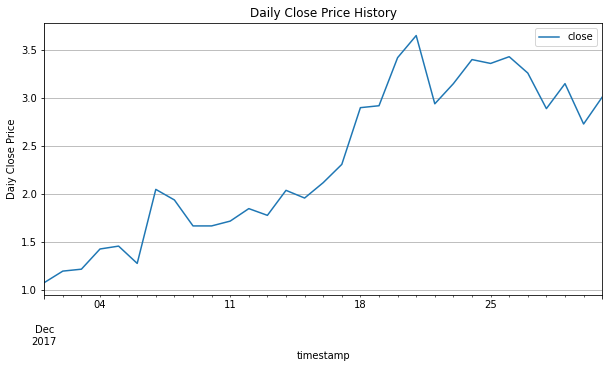

In [865]:
final_df.plot( y="close",figsize=(10, 5), grid=True)
plt.xlabel("timestamp")
plt.ylabel("Daiy Close Price")
plt.title("Daily Close Price History")


In [866]:
final_df.columns

Index(['8_upvote_post_steemit_comment', '9_steemit_love_friend_year',
       '12_bitcoin_full_story_source_br', '13_market_money_company_report',
       'close'],
      dtype='object')

In [867]:
final_df = pd.DataFrame(final_df.iloc[:,[2,3,4]]).copy()
final_df


,12_bitcoin_full_story_source_br,13_market_money_company_report,close
timestamp,,,
2017-12-01,0.690516,0.550015,1.08
2017-12-02,0.759627,0.565658,1.20
2017-12-03,0.732898,0.558167,1.22
2017-12-04,0.701612,0.557061,1.43
2017-12-05,0.708850,0.559348,1.46
2017-12-06,0.683203,0.565437,1.28
2017-12-07,0.660821,0.568091,2.05
2017-12-08,0.659044,0.487638,1.94
2017-12-09,0.671777,0.561277,1.67


In [868]:
dataset = final_df.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
#print('dataset.shape', dataset.shape)
num_of_features = len(final_df.columns)
print('Number of features', num_of_features)

Number of features 3


In [869]:
look_back = 1
lstm_layers = 64
epochs=125


In [870]:
train_size_percent = 0.80
pred_col = final_df.columns.get_loc('close')

# function to split the data
def create_dataset(dataset, pred_col, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, pred_col])
    return np.array(dataX), np.array(dataY)


train_size = int(len(dataset) * train_size_percent)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

trainX, trainY = create_dataset(train, pred_col, look_back=look_back)
testX, testY = create_dataset(test, pred_col, look_back=look_back)


# reshape input to be  [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_of_features))
testX = np.reshape(testX, (testX.shape[0],look_back, num_of_features))

print('Training dataset length ', len(train))
print('Testing dataset length ', len(test))
print('look_back ', look_back)

Training dataset length  24
Testing dataset length  7
look_back  1


In [871]:
print(testX.shape,testY.shape)

(5, 1, 3) (5,)


In [872]:
model = Sequential()
model.add(Bidirectional(LSTM(lstm_layers, input_shape=(look_back,num_of_features))))
model.add(Dense(5))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history= model.fit(trainX, trainY,validation_split=0.30, epochs=epochs,shuffle=False)

Epoch 1/125
1/1 [==============================] - 28s 28s/step - loss: 0.0480 - val_loss: 0.5551
Epoch 2/125
1/1 [==============================] - 0s 156ms/step - loss: 0.0392 - val_loss: 0.5174
Epoch 3/125
1/1 [==============================] - 0s 133ms/step - loss: 0.0319 - val_loss: 0.4815
Epoch 4/125
1/1 [==============================] - 0s 153ms/step - loss: 0.0261 - val_loss: 0.4475
Epoch 5/125
1/1 [==============================] - 0s 121ms/step - loss: 0.0218 - val_loss: 0.4156
Epoch 6/125
1/1 [==============================] - 0s 169ms/step - loss: 0.0189 - val_loss: 0.3861
Epoch 7/125
1/1 [==============================] - 0s 191ms/step - loss: 0.0172 - val_loss: 0.3594
Epoch 8/125
1/1 [==============================] - 0s 188ms/step - loss: 0.0167 - val_loss: 0.3359
Epoch 9/125
1/1 [==============================] - 0s 241ms/step - loss: 0.0169 - val_loss: 0.3159
Epoch 10/125
1/1 [==============================] - 0s 192ms/step - loss: 0.0176 - val_loss: 0.2996
Epoch 11/1

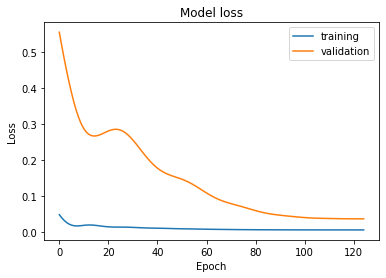

In [873]:
# Plot training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [874]:
trainPredict = model.predict(trainX) # Trainset predictions
testPredict = model.predict(testX) # Test_set predictions

# Get something which has as many features as dataset
trainPredict_extended = np.zeros((len(trainPredict),num_of_features))
# Put the predictions there
trainPredict_extended[:,pred_col] = trainPredict[:,0]
# Inverse transform it and select the 3rd column.
trainPredict = scaler.inverse_transform(trainPredict_extended) [:,pred_col]

# Get something which has as many features as dataset
testPredict_extended = np.zeros((len(testPredict),num_of_features))
# Put the predictions there
testPredict_extended[:,pred_col] = testPredict[:,0]
# Inverse transform it and select the pred_col column.
testPredict = scaler.inverse_transform(testPredict_extended)[:,pred_col] 

trainY_extended = np.zeros((len(trainY),num_of_features))
trainY_extended[:,pred_col]=trainY
trainY = scaler.inverse_transform(trainY_extended)[:,pred_col]

testY_extended = np.zeros((len(testY),num_of_features))
testY_extended[:,pred_col]=testY
testY = scaler.inverse_transform(testY_extended)[:,pred_col]

# calculate root mean squared error
trainScore_RMSE = math.sqrt(mean_squared_error(trainY, trainPredict))
testScore_RMSE = math.sqrt(mean_squared_error(testY, testPredict))

# calculate absolute mean error
trainScore_MAE = np.sum(np.absolute(trainY - trainPredict))/len(trainY)
testScore_MAE = np.sum(np.absolute(testY - testPredict))/len(testY)

In [875]:
print(trainScore_RMSE,trainScore_MAE)

0.31936864363159273 0.24044375061630435


In [876]:
print(testScore_RMSE,testScore_MAE)

0.3181908681057473 0.30552508471455464


Text(0.5, 1.0, 'Steem Price Prediction')

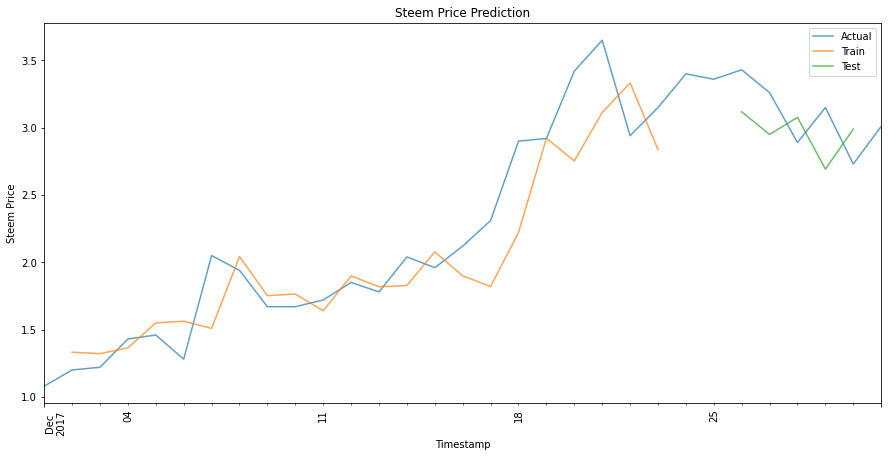

In [877]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, pred_col] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, pred_col] = testPredict

# contruct pandas dataframe for plotting
time_df = pd.DataFrame(final_df.index)
time_df['Actual'] = scaler.inverse_transform(dataset)[:,pred_col]
df1 = pd.DataFrame(trainPredictPlot[:,pred_col],columns=['Train'])
df2 = pd.DataFrame(testPredictPlot[:,pred_col],columns=['Test'])
time_df2 = pd.concat([time_df, df1, df2], axis=1, sort=False)
time_df2.set_index('timestamp',inplace=True)

# plot the output
fig, ax = plt.subplots(figsize=(15,7))
time_df2.plot(ax=ax,rot=90,alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Steem Price')
plt.title('Steem Price Prediction')


In [ ]:
0.8969952927670691 0.702876181958878


In [114]:
##FULL

print(trainScore_RMSE,trainScore_MAE)

0.3565553033212433 0.2597620729111325


In [115]:
print(testScore_RMSE,testScore_MAE)

0.43143869391714657 0.3547568135838626


In [130]:
##BITCOIN AND MARKET

print(trainScore_RMSE,trainScore_MAE)

0.31746201258865187 0.24129058544385662


In [131]:
print(testScore_RMSE,testScore_MAE)

0.31996400680632303 0.30727128985023044


In [146]:
##BITCOIN

print(trainScore_RMSE,trainScore_MAE)

0.3495184896893735 0.25903783311469114


In [147]:
print(testScore_RMSE,testScore_MAE)

0.3746822738311195 0.2928573846689518


In [160]:
##MARKET

print(trainScore_RMSE,trainScore_MAE)

print(testScore_RMSE,testScore_MAE)

0.46730672379238286 0.3351199160178734
0.6298092762028549 0.5759526471642051


In [175]:
##UPVOTE AND STEEMIT

print(trainScore_RMSE,trainScore_MAE)

print(testScore_RMSE,testScore_MAE)

0.4175345647463488 0.30107007589248214
0.5261657058075663 0.46153089896461424


In [177]:
0.5124404830932618/0.2928573846689518

1.7497953267339612